# Hedef değişken ve özellikler arasındaki ilişki

h
a
r
c
a
m
a
l
a
r
=
873
+
0.0012
∗
y
ı
l
l
ı
k
_
g
e
l
i
r
+
0.00002
∗
y
ı
l
l
ı
k
_
g
e
l
i
r
2
−
223.57
∗
c
o
c
u
k
_
s
a
h
i
b
i

Katsayıların P degerlerinin 0,05 altında olması, hedef değişken ile aralarında ilişki oldugunun kanıtıdır.
Ayrıca denklemde görülüyor ki ; çocuk_sahibi olan ailelerin eğlence masrafları çocuk sahibi olmayana ailelere oranla daha azdır.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
df['goal']= df['Temperature (C)'] -df['Apparent Temperature (C)']

In [22]:
df['explain_variable']= df['Wind Speed (km/h)'] * df['goal']
df['expalin_variable_2'] = df['Humidity'] * df['goal']
df['expalin_variable_3'] = df['Humidity'] * df['Wind Speed (km/h)']

In [23]:
Y = df['goal']
X = df[['Humidity','Wind Speed (km/h)',"Pressure (millibars)","explain_variable",'expalin_variable_2','expalin_variable_3']]

In [24]:
import statsmodels.api as sm
from sklearn import linear_model

X = sm.add_constant(X)
results= sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   goal   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 7.025e+05
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:41:52   Log-Likelihood:                -3562.4
No. Observations:               96453   AIC:                             7139.
Df Residuals:                   96446   BIC:                             7205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1365      0.009     14.623      0.000       0.118       0.155
Humidity                 0.0045      0.008      0.570      0.569      -0.011       0.020
Wind Speed (km/h)        0.0339      0.000     73.098      0.000       0.033       0.035
Pressure (millibars) -2.676e-05   6.92e-06     -3.867      0.000   -4.03e-05   -1.32e-05
explain_variable         0.0108   5.21e-05    207.380      0.000       0.011       0.011
expalin_variable_2       1.0478      0.001    857.796      0.000       1.045       1.050
expalin_variable_3      -0.0644      0.001    -98.121      0.000      -0.066      -0.063
==============================================================================
Omnibus:                    47439.614   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4723967.221
Skew:                           1.436   Prob(JB):                         0.00
Kurtosis:                      37.164   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

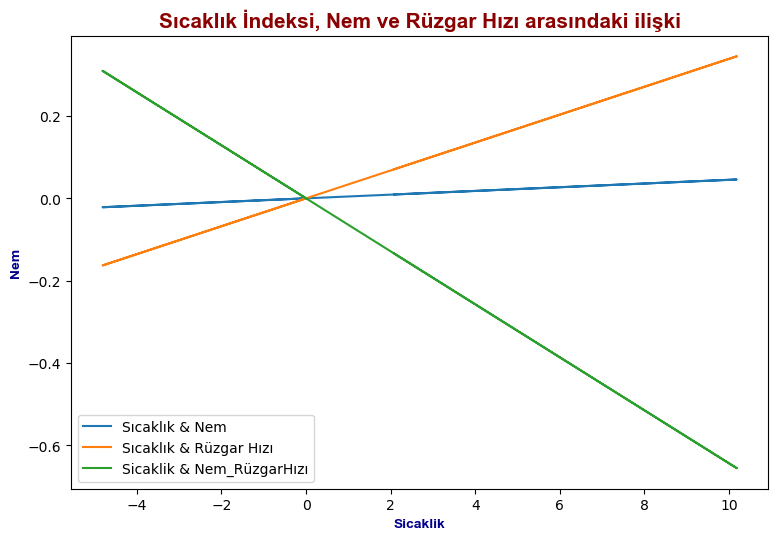

In [31]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi = 100)


nem_sicaklik = df.goal * 0.0045	
ruzgar_hizi_sicaklik = df.goal * 0.0339
#basinc_sicaklik = df['Pressure (millibars)'] * -9.898e-05
ruzgar_nem_sicaklik= df.goal * -0.0644	

plt.plot(df.goal, nem_sicaklik)
plt.plot(df.goal,ruzgar_hizi_sicaklik)
plt.plot(df.goal, ruzgar_nem_sicaklik)
plt.legend(["Sıcaklık & Nem", "Sıcaklık & Rüzgar Hızı", "Sicaklik & Nem_RüzgarHızı"])
plt.xlabel("Sicaklik", fontdict=eksen_font)
plt.ylabel("Nem", fontdict=eksen_font)
plt.title("Sıcaklık İndeksi, Nem ve Rüzgar Hızı arasındaki ilişki", fontdict=baslik_font)

plt.show()

### Özetle ; Rüzgar hızı ve nem azaldıkça sıcaklık artıyor. Sıcaklık artıkça; rüzgar hızı nem e oranla daha fazla artıyor. 

# House Prices Data Set

In [32]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
df.isnull().sum()*100/df.shape[0]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [41]:
df_corr=df.corr()
display(df_corr['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr